# Analysis of Loan Eligibility using Decision Tree Classifier #

In [374]:
# Import modules and libraries #
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Pre-Process the Data ##

In [375]:
# Load in train/test data and pre-process #
train_data = pd.read_csv('loan-train.csv')
train_data.dropna(inplace=True)
train_data.drop('Loan_ID', axis=1, inplace=True)

train_data['Dependents'] = train_data['Dependents'].replace({'3+': '3'})

# Lets convert the strings to floats #


gender_to_float = {'Male': 0.0, 'Female': 1.0}
train_data['Gender'] = train_data['Gender'].map(gender_to_float)
train_data

married_to_float = {'Yes': 0.0, 'No': 1.0}
train_data['Married'] = train_data['Married'].map(married_to_float)
train_data

education_to_float = {'Graduate': 0.0, 'Not Graduate': 1.0 }
train_data['Education'] = train_data['Education'].map(education_to_float)
train_data

employed_to_float = {'Yes': 0.0, 'No': 1.0 }
train_data['Self_Employed'] = train_data['Self_Employed'].map(employed_to_float)
train_data

property_to_float = {'Rural': 0.0, 'Semiurban': 1.0, 'Urban': 2.0 }
train_data['Property_Area'] = train_data['Property_Area'].map(property_to_float)
train_data

loan_to_float = {'Y': 0.0, 'N': 1.0}
train_data['Loan_Status'] = train_data['Loan_Status'].map(loan_to_float)
train_data


train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,0.0,1,0.0,1.0,4583,1508.0,128.0,360.0,1.0,0.0,1.0
2,0.0,0.0,0,0.0,0.0,3000,0.0,66.0,360.0,1.0,2.0,0.0
3,0.0,0.0,0,1.0,1.0,2583,2358.0,120.0,360.0,1.0,2.0,0.0
4,0.0,1.0,0,0.0,1.0,6000,0.0,141.0,360.0,1.0,2.0,0.0
5,0.0,0.0,2,0.0,0.0,5417,4196.0,267.0,360.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,0,0.0,1.0,2900,0.0,71.0,360.0,1.0,0.0,0.0
610,0.0,0.0,3,0.0,1.0,4106,0.0,40.0,180.0,1.0,0.0,0.0
611,0.0,0.0,1,0.0,1.0,8072,240.0,253.0,360.0,1.0,2.0,0.0
612,0.0,0.0,2,0.0,1.0,7583,0.0,187.0,360.0,1.0,2.0,0.0


In [376]:
test_data = pd.read_csv('loan-test.csv')
test_data.dropna(inplace=True)
test_data.drop('Loan_ID', axis=1, inplace=True)

test_data['Dependents'] = test_data['Dependents'].replace({'3+': '3'})

# Lets convert the strings to floats #


gender_to_float = {'Male': 0.0, 'Female': 1.0}
test_data['Gender'] = test_data['Gender'].map(gender_to_float)

married_to_float = {'Yes': 0.0, 'No': 1.0}
test_data['Married'] = test_data['Married'].map(married_to_float)
test_data

education_to_float = {'Graduate': 0.0, 'Not Graduate': 1.0 }
test_data['Education'] = test_data['Education'].map(education_to_float)
test_data

employed_to_float = {'Yes': 0.0, 'No': 1.0 }
test_data['Self_Employed'] = test_data['Self_Employed'].map(employed_to_float)
test_data

property_to_float = {'Rural': 0.0, 'Semiurban': 1.0, 'Urban': 2.0 }
test_data['Property_Area'] = test_data['Property_Area'].map(property_to_float)
test_data


test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0,0.0,1.0,5720,0,110.0,360.0,1.0,2.0
1,0.0,0.0,1,0.0,1.0,3076,1500,126.0,360.0,1.0,2.0
2,0.0,0.0,2,0.0,1.0,5000,1800,208.0,360.0,1.0,2.0
4,0.0,1.0,0,1.0,1.0,3276,0,78.0,360.0,1.0,2.0
5,0.0,0.0,0,1.0,0.0,2165,3422,152.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.0,1,0.0,1.0,2269,2167,99.0,360.0,1.0,1.0
362,0.0,0.0,3,1.0,0.0,4009,1777,113.0,360.0,1.0,2.0
363,0.0,0.0,0,0.0,1.0,4158,709,115.0,360.0,1.0,2.0
365,0.0,0.0,0,0.0,1.0,5000,2393,158.0,360.0,1.0,0.0


In [377]:
X_train = train_data.drop('Loan_Status', axis=1)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0.0,0.0,1,0.0,1.0,4583,1508.0,128.0,360.0,1.0,0.0
2,0.0,0.0,0,0.0,0.0,3000,0.0,66.0,360.0,1.0,2.0
3,0.0,0.0,0,1.0,1.0,2583,2358.0,120.0,360.0,1.0,2.0
4,0.0,1.0,0,0.0,1.0,6000,0.0,141.0,360.0,1.0,2.0
5,0.0,0.0,2,0.0,0.0,5417,4196.0,267.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1.0,0,0.0,1.0,2900,0.0,71.0,360.0,1.0,0.0
610,0.0,0.0,3,0.0,1.0,4106,0.0,40.0,180.0,1.0,0.0
611,0.0,0.0,1,0.0,1.0,8072,240.0,253.0,360.0,1.0,2.0
612,0.0,0.0,2,0.0,1.0,7583,0.0,187.0,360.0,1.0,2.0


In [378]:
X_test = test_data
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0,0.0,1.0,5720,0,110.0,360.0,1.0,2.0
1,0.0,0.0,1,0.0,1.0,3076,1500,126.0,360.0,1.0,2.0
2,0.0,0.0,2,0.0,1.0,5000,1800,208.0,360.0,1.0,2.0
4,0.0,1.0,0,1.0,1.0,3276,0,78.0,360.0,1.0,2.0
5,0.0,0.0,0,1.0,0.0,2165,3422,152.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.0,1,0.0,1.0,2269,2167,99.0,360.0,1.0,1.0
362,0.0,0.0,3,1.0,0.0,4009,1777,113.0,360.0,1.0,2.0
363,0.0,0.0,0,0.0,1.0,4158,709,115.0,360.0,1.0,2.0
365,0.0,0.0,0,0.0,1.0,5000,2393,158.0,360.0,1.0,0.0


In [379]:
y_train = train_data['Loan_Status']
pd.DataFrame(y_train)

,Loan_Status
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
609,0.0
610,0.0
611,0.0
612,0.0


## Add model parameters, fit to data, and predict dependent variable ##

In [380]:
dtc_model = DecisionTreeClassifier(criterion='gini', max_depth=4, ccp_alpha=0.0)
dtc_model

DecisionTreeClassifier(max_depth=4)

In [381]:
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [382]:
dtc_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [393]:
dtc_model.predict_proba(X_test)

array([[0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.02325581, 0.97674419],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.4375    , 0.5625    ],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.4375    , 0.5625    ],
       [1.        , 0.        ],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.02325581, 0.97674419],
       [0.81794195, 0.18205805],
       [0.81794195, 0.18205805],
       [0.

In [384]:
train_predictions = dtc_model.predict(X_train)
train_predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0.

In [385]:
test_predictions = dtc_model.predict(X_test)
test_predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0.

### Determine metrics ###

In [386]:
print(classification_report(y_train, train_predictions))


              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       332
         1.0       0.83      0.53      0.65       148

    accuracy                           0.82       480
   macro avg       0.83      0.74      0.77       480
weighted avg       0.82      0.82      0.81       480



In [387]:
confusion_matrix(y_train, train_predictions, labels=[0.0, 1.0])

array([[316,  16],
       [ 69,  79]])

In [388]:
features = X_train.columns
pd.DataFrame(features)

,0
0,Gender
1,Married
2,Dependents
3,Education
4,Self_Employed
5,ApplicantIncome
6,CoapplicantIncome
7,LoanAmount
8,Loan_Amount_Term
9,Credit_History


In [389]:
feature_importance = pd.DataFrame(dtc_model.feature_importances_, index=features).sort_values(0, ascending=False)
feature_importance

,0
Credit_History,0.809067
Loan_Amount_Term,0.070201
LoanAmount,0.059233
Self_Employed,0.028554
Married,0.014101
CoapplicantIncome,0.009910
ApplicantIncome,0.008934
Gender,0.000000
Dependents,0.000000
Education,0.000000


In [390]:
important_features = list(feature_importance[feature_importance[0]>0].index)
important_features

['Credit_History',
 'Loan_Amount_Term',
 'LoanAmount',
 'Self_Employed',
 'Married',
 'CoapplicantIncome',
 'ApplicantIncome']

<Axes: >

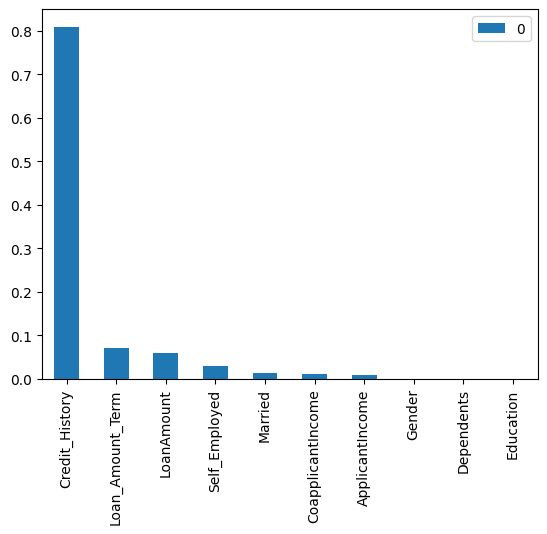

In [395]:
feature_importance.head(10).plot(kind='bar')


In [ ]:
##

Text(0.5, 1.0, 'Loan Eligibility')

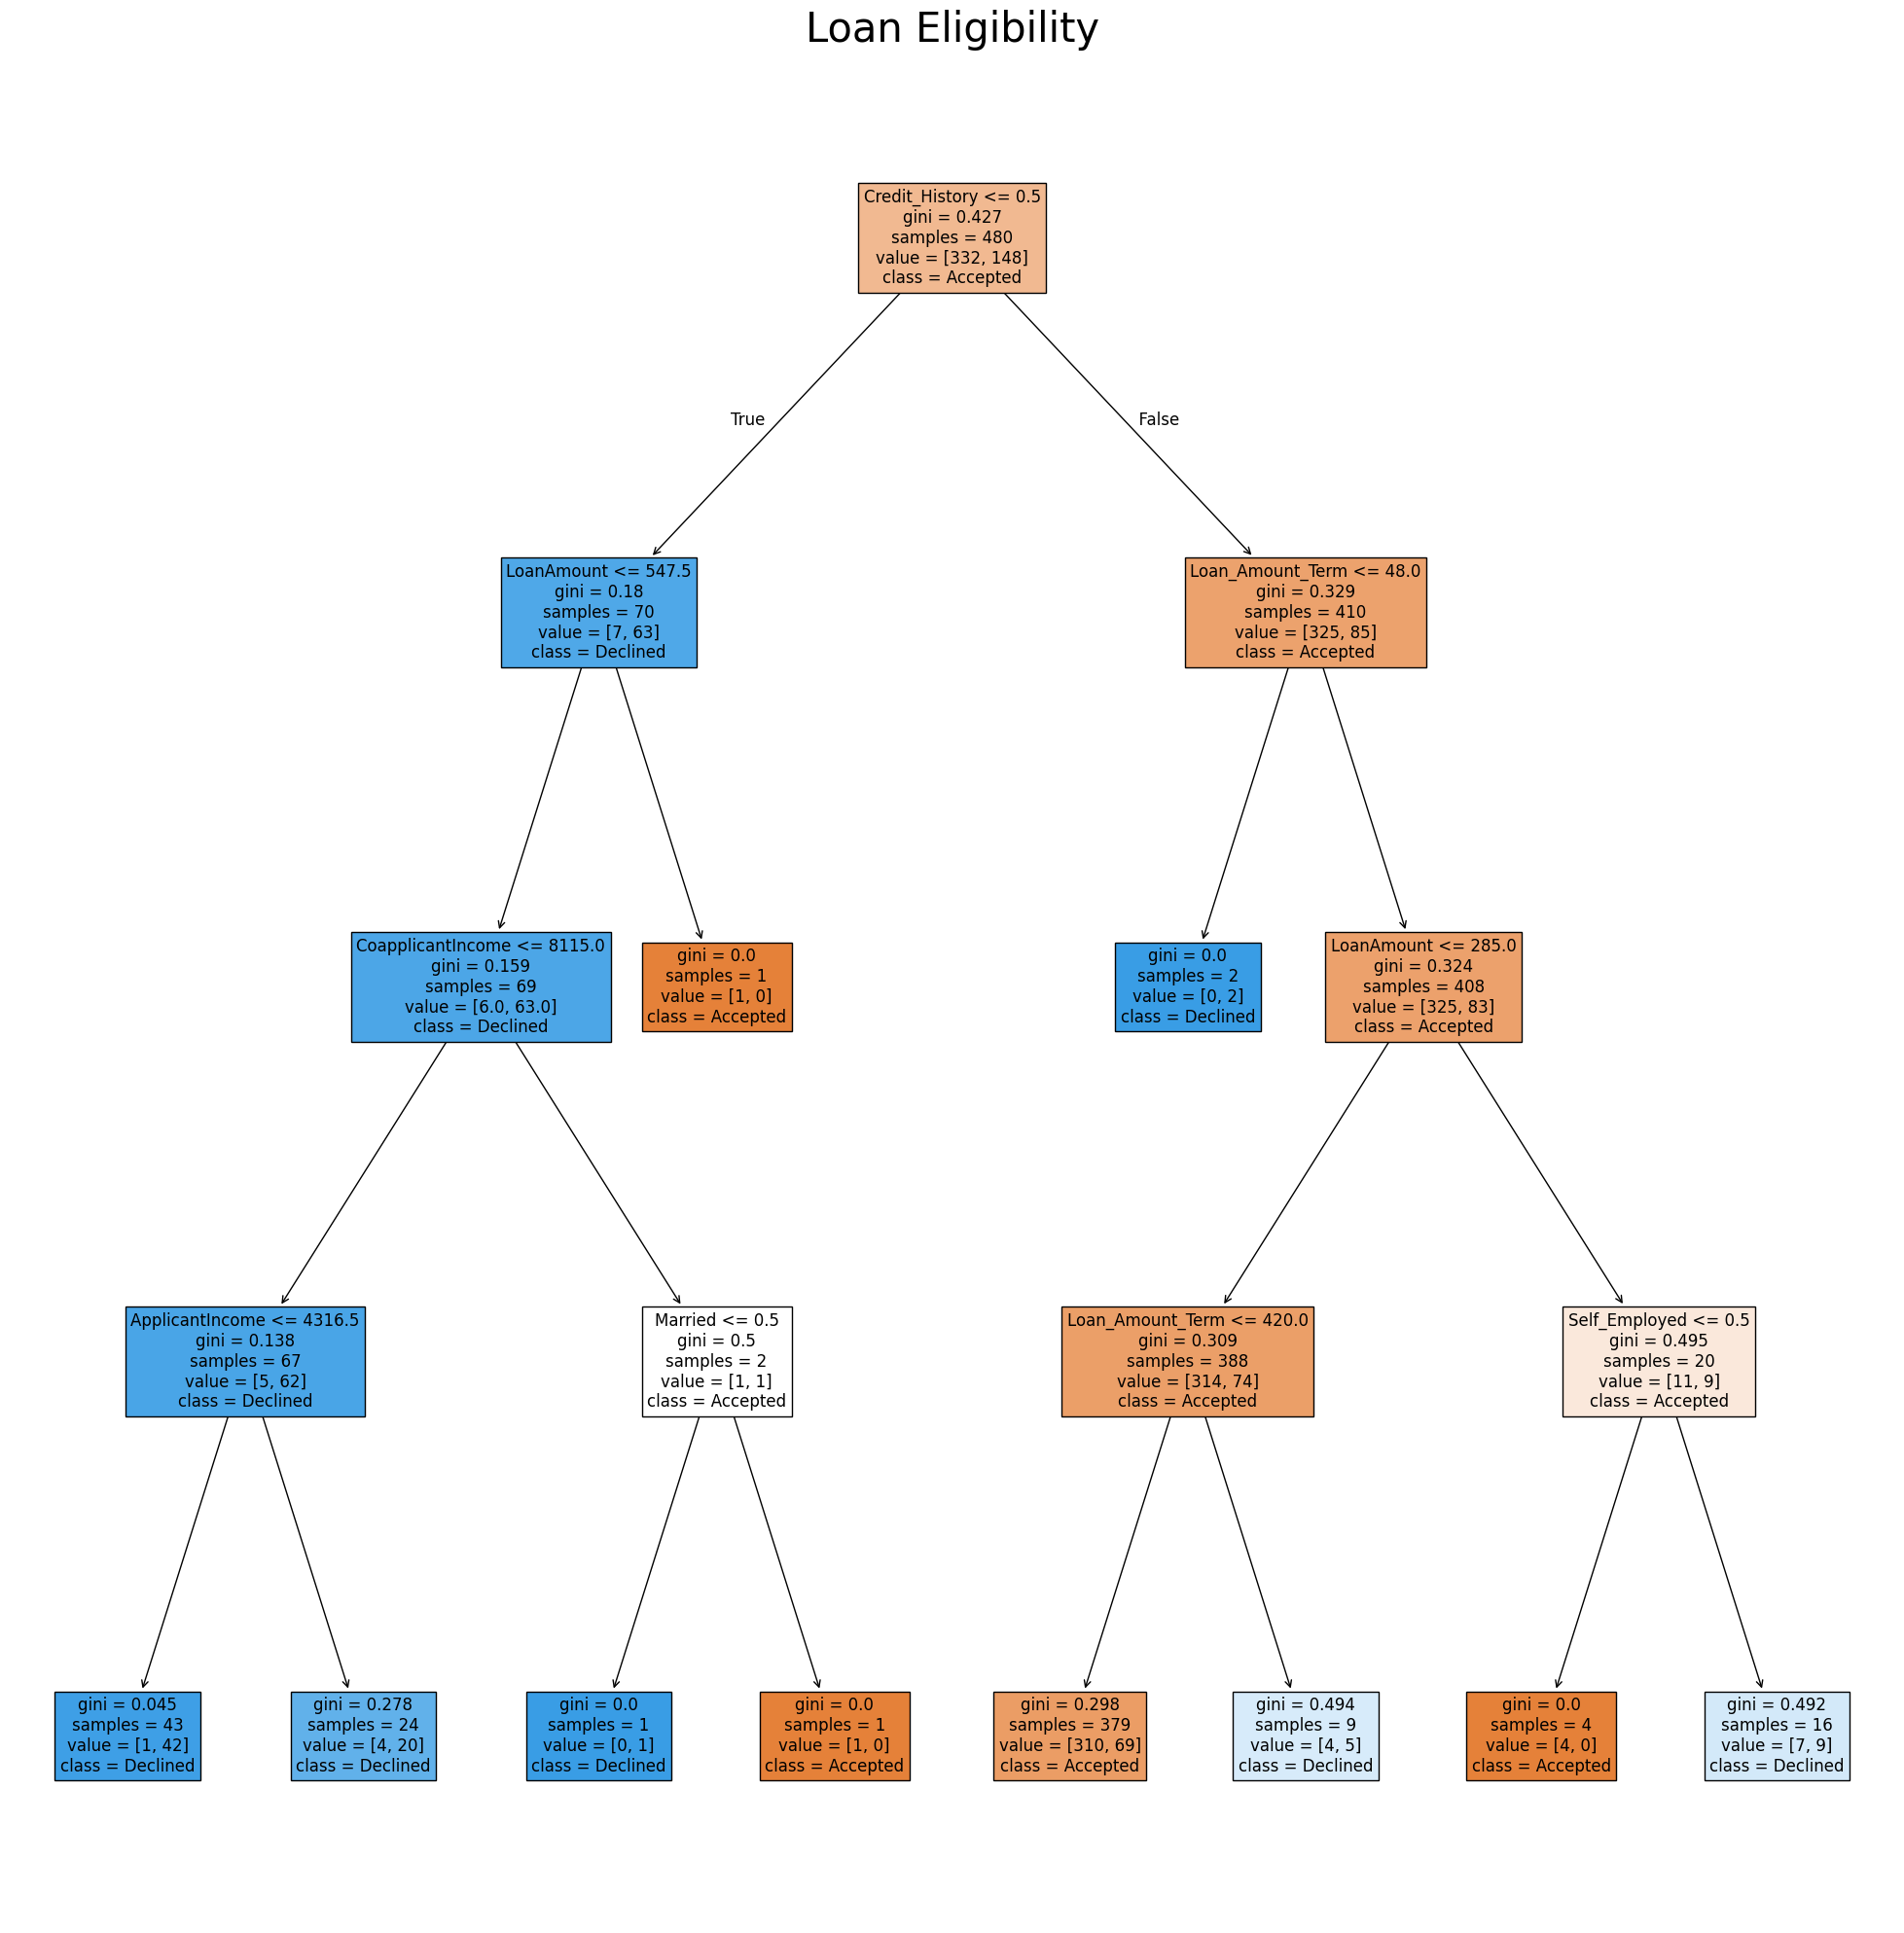

In [392]:
from sklearn import tree

fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(dtc_model,
                   feature_names=features,
                   class_names={0.0: 'Accepted', 1.0: 'Declined'},
                   filled=True,
                   fontsize=12)

plt.title('Loan Eligibility', fontsize=30)